# Importing Libraries

In [2]:
from functions.adversarial import *
from functions.dip import *
from functions.classification import *
import matplotlib.pyplot as plt
import cv2
import numpy as np
from functions.utils import *

#device = torch.device("cuda" if torch.cuda.device_count() else "cpu")

tensor([[[[2.6802e-04, 2.0000e-02, 7.5575e-02,  ..., 4.9371e-02,
           2.5716e-02, 2.8886e-02],
          [5.5896e-02, 5.9683e-02, 4.9387e-02,  ..., 5.2216e-02,
           1.7360e-02, 1.0781e-02],
          [1.9650e-02, 7.8943e-02, 2.4010e-02,  ..., 9.2337e-02,
           4.9352e-02, 7.4834e-02],
          ...,
          [6.9928e-02, 5.4096e-02, 5.2072e-02,  ..., 5.1654e-02,
           8.7596e-02, 5.7591e-02],
          [2.3728e-03, 8.6956e-03, 9.8613e-02,  ..., 7.6034e-02,
           4.0431e-02, 5.9519e-02],
          [4.0020e-02, 5.5520e-03, 7.1264e-02,  ..., 7.8711e-02,
           6.4325e-02, 9.2023e-02]],

         [[4.0980e-02, 2.5666e-02, 7.7285e-03,  ..., 8.1084e-02,
           6.4419e-02, 2.6315e-02],
          [7.4522e-02, 8.9393e-02, 8.9915e-02,  ..., 3.3687e-04,
           5.4806e-02, 4.9030e-02],
          [7.6289e-02, 6.6012e-02, 6.1110e-02,  ..., 8.9125e-02,
           2.0987e-02, 9.2936e-02],
          ...,
          [4.1558e-02, 2.3202e-02, 2.9123e-02,  ..., 1.4280

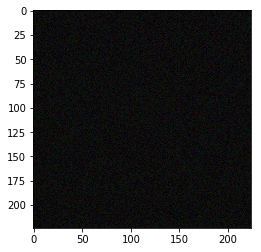

In [3]:
net_input = get_noise(3, 'noise', (224, 224))
print(net_input)
print(net_input.shape)
net_input_saved = net_input.detach().clone()
noise = net_input.detach().clone()
last_net = 
net_input = global_values.net_input_saved + (global_values.noise.normal_() * global_values.noise_std)

# Fast Gradient Descent Method

In [ ]:
adv1, orig, pert = adversarial_examples('data/goldfish.jpg', method='FGSM',eps=100,show=False)

# Basic Iterative Method

In [ ]:
adv2, orig, pert = adversarial_examples('data/goldfish.jpg',method='BI',eps=100,show=False)

# Least Likely Class Iterative

In [ ]:
adv3, orig, pert = adversarial_examples('data/goldfish.jpg',method='LLCI',eps=100,show=False)

## Some plotting

In [ ]:
fig=plt.figure(figsize=(16,16))

fig.add_subplot(1, 3, 1)
plt.title('FGSM')
plt.imshow(adv1)

fig.add_subplot(1, 3, 2)
plt.title('BI')
plt.imshow(adv2)

fig.add_subplot(1, 3, 3)
plt.title('LLCI')
plt.imshow(adv3)

plt.show()

## Save images
plt.imsave("results/Goldfish_fgsm_eps100.png", adv1, format="png")
plt.imsave("results/Goldfish_bi_eps100.png", adv2, format="png")
plt.imsave("results/Goldfish_llci_eps100.png", adv3, format="png")

# Using Deep Image Prior

In [ ]:
orig = cv2.imread("data/lighthouse.jpg")[..., ::-1]
orig = cv2.resize(orig, (256, 256))
img = orig.copy().astype(np.float32)

## Save images
#plt.imsave("results/F16_noisy.png", np.clip(img_noisy, 0, 1), format="png")
#plt.imsave("results/F16.png", np.clip(img, 0, 1), format="png")

dip_out = dip(img, num_iter=10001, save=False, plot=False, save_path='results/Adv_DIP/', arch='complex')

# Observing general images

In [ ]:
i=20
orig = cv2.imread("results/Adv_DIP/FGSM_eps100/it_{}.png".format(i*100))[..., ::-1]
orig = cv2.resize(orig, (256, 256))
img = orig.copy().astype(np.float32)
P,R = classification(img)
plt.imshow(orig) 

In [ ]:
std = 150
value = 100

adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='FGSM',eps=value, show=False)
adv_noisy = adv + std*np.random.randn(224,224,3)
adv_noisy = np.clip(adv_noisy,0,255).astype(np.uint8)
plt.imshow(adv_noisy)
plt.show()

In [ ]:
it_300 = cv2.imread("results/Adv_DIP/LLCI_eps5/it_{}.png".format(300))[..., ::-1]
it_1200 = cv2.imread("results/Adv_DIP/LLCI_eps5/it_{}.png".format(1200))[..., ::-1]
it_2500 = cv2.imread("results/Adv_DIP/LLCI_eps5/it_{}.png".format(5000))[..., ::-1]
orig = cv2.imread('data/panda.jpg')[...,::-1]

P,R = classification(orig)
P,R = classification(it_300)
P,R = classification(it_1200)
P,R = classification(it_2500)

## Classifying

In [ ]:
# Find original classification class
iterations = 9101
#adv, orig, pert = adversarial_examples('data/goldfish.jpg',model_name = 'resnet18', method='LLCI',eps=100, show=False)
P, R = classification(orig, model_name = 'resnet18', sort = True, show=False)
original_class = R[0,0]
P, R = classification(adv, model_name = 'resnet18', sort = True, show=False)
final_classes = R[0,0:5]

# Create matrix to store values
Confidence = np.ones([round((iterations-1)/100+1),6])
Ranks_matrix = np.ones([round((iterations-1)/100+1),5])


for i in range(round((iterations-1)/100+1)):
    orig = cv2.imread("results/Adv_DIP/Complex_LLCI_eps5/it_{}.png".format(i*100))[..., ::-1]
    orig = cv2.resize(orig, (256, 256))
    img = orig.copy().astype(np.float32)
    Probs, Ranks = classification(img, model_name = 'resnet18', sort = False, show = False)
    Probs_np = torch_to_np(Probs)
    Confidence[i,0] = Probs_np[original_class]
    P , Ranking = Probs.sort(descending=True)
    Ranking_np = torch_to_np(Ranking)
    for j in range(5):
        Confidence[i,j+1] = Probs_np[final_classes[j]]
        Ranks_matrix[i,j] = Ranking_np[j]  

In [ ]:
it = np.arange(0, iterations+99, 100)
iters = round((iterations-1)/100+1)
fig = plt.figure(figsize=(6, 6))
plt.xlabel('DIP Iterations')
plt.ylabel('Confidence of true class')
plt.plot(it,Confidence)
plt.show()

# Save stuff
fig.savefig('results/Adv_DIP/Simple_LLCI_eps5/Graph_Complex_LLCI_eps100_full.png')
np.savetxt('results/Adv_DIP/Simple_LLCI_eps5/Complex_LLCI_eps100_full.txt', Confidence)
np.savetxt('results/Adv_DIP/Simple_LLCI_eps5/Complex_LLCI_eps100_ranks.txt', Ranks_matrix)
for i in range(5):
    print(classes[int(Ranks_matrix[-1,i])].split(',')[0])

Number of params: 20355
Starting optimization with ADAM


C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:122: UserWarning: nn.Upsampling is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.Upsampling is deprecated. Use nn.functional.interpolate instead.")
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


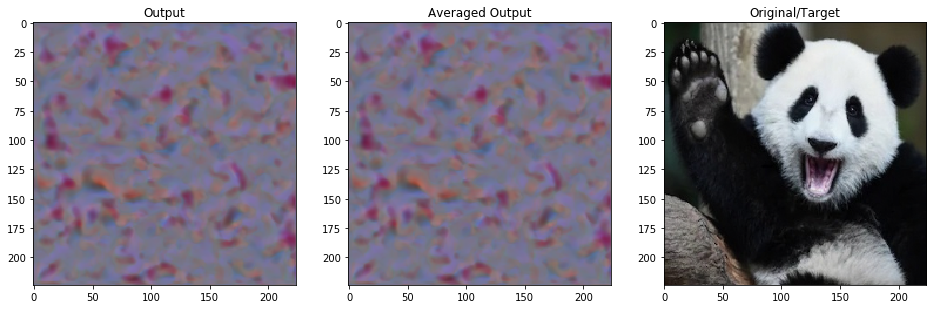

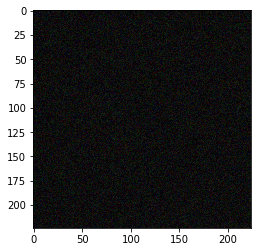

OrderedDict([('1.1.0.weight', tensor([[[[-0.0116,  0.0614,  0.1865],
          [ 0.0030, -0.0865, -0.0508],
          [ 0.1561, -0.1518, -0.0227]],

         [[-0.1740, -0.0756, -0.1775],
          [-0.0592,  0.0682, -0.0883],
          [-0.1347,  0.0761, -0.1395]],

         [[ 0.0665, -0.0348,  0.1870],
          [-0.1751,  0.0317, -0.0479],
          [-0.0087, -0.1542,  0.1518]]],


        [[[ 0.0520,  0.1802,  0.1619],
          [-0.1106,  0.1095, -0.1128],
          [-0.1635,  0.1283, -0.1359]],

         [[-0.0030,  0.1013,  0.1153],
          [-0.1765, -0.0569,  0.1862],
          [ 0.1208, -0.1333,  0.0654]],

         [[ 0.0046,  0.1608, -0.0462],
          [ 0.1043, -0.1406, -0.1355],
          [ 0.0413,  0.0841, -0.0432]]],


        [[[-0.1657, -0.0438,  0.0961],
          [-0.0883,  0.1588, -0.0450],
          [ 0.1363,  0.0150,  0.0288]],

         [[ 0.1852, -0.1839, -0.1640],
          [ 0.0715, -0.1774, -0.1723],
          [-0.1447,  0.0463,  0.0172]],

         [[ 0.

         [[ 0.0709]]]])), ('9.0.bias', tensor([-0.1592, -0.1877, -0.0813]))])
OrderedDict([('1.1.0.weight', tensor([[[[-0.0016,  0.0514,  0.1965],
          [ 0.0129, -0.0965, -0.0408],
          [ 0.1661, -0.1618, -0.0327]],

         [[-0.1642, -0.0656, -0.1875],
          [-0.0692,  0.0782, -0.0783],
          [-0.1247,  0.0861, -0.1495]],

         [[ 0.0565, -0.0248,  0.1771],
          [-0.1651,  0.0217, -0.0579],
          [ 0.0013, -0.1442,  0.1618]]],


        [[[ 0.0420,  0.1902,  0.1519],
          [-0.1007,  0.0996, -0.1228],
          [-0.1734,  0.1188, -0.1259]],

         [[-0.0129,  0.0913,  0.1253],
          [-0.1864, -0.0669,  0.1962],
          [ 0.1109, -0.1233,  0.0754]],

         [[-0.0054,  0.1508, -0.0562],
          [ 0.0944, -0.1306, -0.1454],
          [ 0.0314,  0.0940, -0.0532]]],


        [[[-0.1757, -0.0338,  0.0861],
          [-0.0783,  0.1688, -0.0353],
          [ 0.1263,  0.0250,  0.0388]],

         [[ 0.1952, -0.1739, -0.1540],
          [ 0.08

         [[ 0.0609]]]])), ('9.0.bias', tensor([-0.1692, -0.1977, -0.0913]))])
OrderedDict([('1.1.0.weight', tensor([[[[ 0.0019,  0.0472,  0.1922],
          [ 0.0213, -0.1062, -0.0321],
          [ 0.1712, -0.1715, -0.0426]],

         [[-0.1711, -0.0570, -0.1972],
          [-0.0714,  0.0882, -0.0745],
          [-0.1164,  0.0924, -0.1593]],

         [[ 0.0637, -0.0149,  0.1686],
          [-0.1618,  0.0177, -0.0521],
          [ 0.0015, -0.1500,  0.1699]]],


        [[[ 0.0455,  0.1943,  0.1555],
          [-0.1034,  0.0904, -0.1307],
          [-0.1672,  0.1256, -0.1163]],

         [[-0.0116,  0.0879,  0.1348],
          [-0.1925, -0.0768,  0.1952],
          [ 0.1160, -0.1136,  0.0760]],

         [[-0.0104,  0.1461, -0.0547],
          [ 0.0858, -0.1303, -0.1544],
          [ 0.0362,  0.1026, -0.0604]]],


        [[[-0.1828, -0.0269,  0.0856],
          [-0.0758,  0.1717, -0.0425],
          [ 0.1295,  0.0262,  0.0487]],

         [[ 0.2046, -0.1684, -0.1453],
          [ 0.08

         [[ 0.0509]]]])), ('9.0.bias', tensor([-0.1792, -0.2077, -0.1012]))])
OrderedDict([('1.1.0.weight', tensor([[[[ 0.0061,  0.0451,  0.1908],
          [ 0.0272, -0.1150, -0.0269],
          [ 0.1771, -0.1783, -0.0467]],

         [[-0.1792, -0.0503, -0.2029],
          [-0.0720,  0.0954, -0.0700],
          [-0.1117,  0.0901, -0.1691]],

         [[ 0.0688, -0.0057,  0.1600],
          [-0.1586,  0.0146, -0.0480],
          [ 0.0072, -0.1571,  0.1686]]],


        [[[ 0.0476,  0.1902,  0.1550],
          [-0.1001,  0.0843, -0.1369],
          [-0.1608,  0.1268, -0.1134]],

         [[-0.0077,  0.0854,  0.1437],
          [-0.1981, -0.0866,  0.1952],
          [ 0.1194, -0.1103,  0.0774]],

         [[-0.0179,  0.1455, -0.0527],
          [ 0.0813, -0.1280, -0.1617],
          [ 0.0336,  0.1069, -0.0661]]],


        [[[-0.1876, -0.0209,  0.0844],
          [-0.0762,  0.1736, -0.0430],
          [ 0.1353,  0.0292,  0.0580]],

         [[ 0.2141, -0.1630, -0.1404],
          [ 0.08

         [[ 0.0416]]]])), ('9.0.bias', tensor([-0.1892, -0.2175, -0.1112]))])
OrderedDict([('1.1.0.weight', tensor([[[[ 0.0083,  0.0407,  0.1883],
          [ 0.0341, -0.1214, -0.0204],
          [ 0.1841, -0.1826, -0.0483]],

         [[-0.1868, -0.0439, -0.2070],
          [-0.0743,  0.1016, -0.0675],
          [-0.1072,  0.0929, -0.1791]],

         [[ 0.0736,  0.0020,  0.1523],
          [-0.1562,  0.0137, -0.0442],
          [ 0.0146, -0.1601,  0.1628]]],


        [[[ 0.0526,  0.1842,  0.1568],
          [-0.0945,  0.0796, -0.1441],
          [-0.1534,  0.1239, -0.1106]],

         [[-0.0039,  0.0847,  0.1529],
          [-0.2054, -0.0955,  0.1927],
          [ 0.1208, -0.1088,  0.0809]],

         [[-0.0215,  0.1440, -0.0503],
          [ 0.0758, -0.1249, -0.1623],
          [ 0.0286,  0.1133, -0.0724]]],


        [[[-0.1932, -0.0170,  0.0849],
          [-0.0749,  0.1779, -0.0471],
          [ 0.1422,  0.0353,  0.0670]],

         [[ 0.2217, -0.1572, -0.1335],
          [ 0.09

         [[ 0.0330]]]])), ('9.0.bias', tensor([-0.1990, -0.2273, -0.1210]))])
OrderedDict([('1.1.0.weight', tensor([[[[ 0.0096,  0.0389,  0.1876],
          [ 0.0414, -0.1283, -0.0173],
          [ 0.1921, -0.1848, -0.0496]],

         [[-0.1921, -0.0392, -0.2075],
          [-0.0785,  0.1070, -0.0619],
          [-0.1014,  0.0948, -0.1889]],

         [[ 0.0743,  0.0072,  0.1514],
          [-0.1538,  0.0142, -0.0459],
          [ 0.0152, -0.1582,  0.1554]]],


        [[[ 0.0577,  0.1834,  0.1590],
          [-0.0877,  0.0741, -0.1455],
          [-0.1453,  0.1256, -0.1080]],

         [[-0.0010,  0.0841,  0.1620],
          [-0.2119, -0.1041,  0.1902],
          [ 0.1212, -0.1039,  0.0829]],

         [[-0.0207,  0.1438, -0.0493],
          [ 0.0734, -0.1236, -0.1633],
          [ 0.0254,  0.1186, -0.0800]]],


        [[[-0.1942, -0.0157,  0.0875],
          [-0.0737,  0.1834, -0.0505],
          [ 0.1502,  0.0429,  0.0761]],

         [[ 0.2298, -0.1516, -0.1285],
          [ 0.09

         [[ 0.0245]]]])), ('9.0.bias', tensor([-0.2088, -0.2369, -0.1308]))])
> c:\users\andreas\documents\university of cambridge - engineering\engineering iib\4th year project\vi. code\interpretability\functions\dip.py(171)closure()
    169         if iter_value == 5:
    170             set_trace()
--> 171         return total_loss
    172 
    173     p = get_params(OPT_OVER, net, net_input)



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
#import argparse
import numpy as np
from functions.utils import *
from functions.adversarial import *
from functions.dip import *
from functions.classification import *
import torch

images = ['panda.jpg']    #,'peacock.jpg','F16_GT.png','monkey.jpg','zebra_GT.png']
for i in images:
    adv, orig, pert = adversarial_examples("data/{}".format(i), method = "FGSM", eps=1, show=False)
    out = dip(adv, num_iter=51, save=False, plot=True, save_path='results/Adv_DIP/{}'.format(i), arch='simple')